In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_12204\2103078997.py:3: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Columns: 2988 entries, QUESTID2 to VEREP
dtypes: float64(539), int64(2447), object(2)
memory usage: 1.3+ GB


#### MJEVER - Ever used marijuana/hashish
#### MJAGE - Age when first used marijuana/hashish
#### MJYFU - Year of first use marijuana/hashish use
#### MJMFU - Month of first use marijuana/hashish use
#### MJREC - Time sence last use marijuana/hashish
#### MJYRTOT - Total number of days used marijuana/hashish in past 12 months
#### MRTOTFG - Trimming indicator for MJRTOT
#### MJFQFLG - Trimmed MJRTOT if R is used < 12
#### MRBSTWAY -  EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH 
#### MRDAYPYR - # DAYS USED MARIJUANA/HASHISH PAST 12 MONTHS
#### MRDAYPMO - # DAYS PER MO USED MARIJUANA/HASHISH PAST 12 MOS
#### MRDAYPWK - # DAYS PER WEEK USED MARIJUANA/HASHISH PAST 12 MOS
#### MJDAY30A - # DAYS USED MARIJUANA/HASHISH PAST 30 DAYS
#### MR30EST - BEST EST. # DAYS USED MARIJUANA PAST 30 DAYS


In [4]:

col_list = ["CIGEVER", 
            "MJEVER",
            "MJYRTOT", # TOTAL # OF DAYS USED MARIJUANA IN PAST 12 MOS (61)
            "ALCEVER", 
            "COCEVER", 
            "CRKEVER", 
            "HEREVER", 
            "LSD", 
            "METHAMEVR",
            "ADDPREV", # SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD (506)
            ]

In [22]:
# Subset dataset to dataframe of variables of interest
df = data[col_list]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CIGEVER    58034 non-null  int64
 1   MJEVER     58034 non-null  int64
 2   MJYRTOT    58034 non-null  int64
 3   ALCEVER    58034 non-null  int64
 4   COCEVER    58034 non-null  int64
 5   CRKEVER    58034 non-null  int64
 6   HEREVER    58034 non-null  int64
 7   LSD        58034 non-null  int64
 8   METHAMEVR  58034 non-null  int64
 9   ADDPREV    58034 non-null  int64
dtypes: int64(10)
memory usage: 4.4 MB


In [23]:
# CIGEVER - Change the 2s in CIGEVER to 0s

df = df[df['CIGEVER'].isin([1,2])]

# Change 2 to 0
df.loc[df['CIGEVER'] == 2, 'CIGEVER'] = 0

# Inspect changes
df['CIGEVER'].value_counts()

0    33161
1    24873
Name: CIGEVER, dtype: int64

In [24]:
# MJEVER - Drop all rows where MJEVER is not 1 or 2
df = df[df['MJEVER'].isin([1,2])]

# Change 2 to 0
df.loc[df['MJEVER'] == 2, 'MJEVER'] = 0

# Inspect changes
df['MJEVER'].value_counts()


0    32487
1    25355
Name: MJEVER, dtype: int64

### Pre-Process MJYRTOT

In [25]:
# RANGE = 1 - 365 ............................................................................................................... 12010 20.69
# 985 = BAD DATA Logically assigned ............................................................................... 134 0.23
# 991 = NEVER USED MARIJUANA ................................................................................. 32487 55.98
# 993 = DID NOT USE MARIJUANA IN THE PAST 12 MOS........................................... 12956 22.32
# 994 = DON'T KNOW......................................................................................................... 80 0.14
# 997 = REFUSED ................................................................................................................ 41 0.07
# 998 = BLANK (NO ANSWER).......................................................................................... 326 0.56

In [26]:
# Process MJYRTOT

# Set 991 and 993 to 0
df.loc[df['MJYRTOT'] == 991, 'MJYRTOT'] = 0
df.loc[df['MJYRTOT'] == 993, 'MJYRTOT'] = 0

# Inspect
df['MJYRTOT'].value_counts()

0      45373
364     1548
260      717
1        625
2        623
       ...  
135        1
258        1
39         1
136        1
98         1
Name: MJYRTOT, Length: 203, dtype: int64

<Axes: >

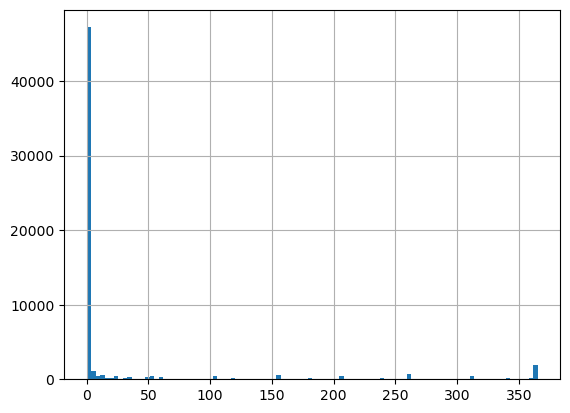

In [27]:
# Drop all values outside of the range: 0-365
df = df[df['MJYRTOT'] <= 365]

# Reinspect using histogram
df['MJYRTOT'].hist(bins=100)

In [28]:
# Scale MJYRTOT to be in the same range as the binary variables (0-1)
df['MJYRTOT'] = df['MJYRTOT'] / 365

# Inspect using summary statistics
df.MJYRTOT.describe()

count    57383.000000
mean         0.081014
std          0.237793
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MJYRTOT, dtype: float64

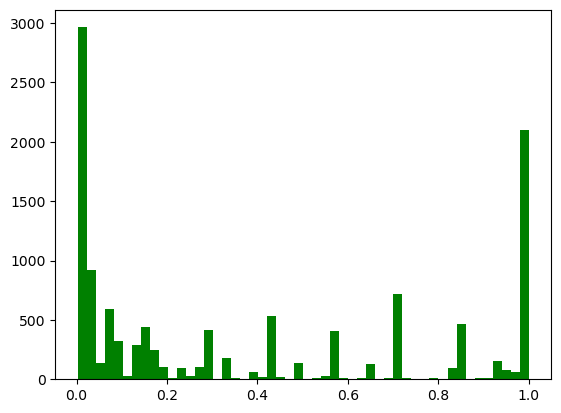

In [29]:
# Plot using histogram
MJTHISYEAR = df[df['MJYRTOT'] > 0]['MJYRTOT']

# Plot histogram
plt.hist(MJTHISYEAR, bins=50, color='green')
plt.show()

In [30]:
# ALCEVER - Drop all rows where MJEVER is not 1 or 2

df = df[df['ALCEVER'].isin([1,2])]

# Change 2 to 0
df.loc[df['ALCEVER'] == 2, 'ALCEVER'] = 0

# Inspect changes
df['ALCEVER'].value_counts()

1    41185
0    16183
Name: ALCEVER, dtype: int64

In [31]:
# COCEVER - Drop all rows where MJEVER is not 1 or 2

df = df[df['COCEVER'].isin([1,2])]

# Change 2 to 0
df.loc[df['COCEVER'] == 2, 'COCEVER'] = 0

# Inspect changes
df['COCEVER'].value_counts()

0    50665
1     6693
Name: COCEVER, dtype: int64

In [32]:
# CRKEVER - Drop all rows where MJEVER is not 1, 2 or 91

df = df[df['CRKEVER'].isin([1,2, 91])]


# set all 2s and 91s to 0s
df.loc[df['CRKEVER'] == 2, 'CRKEVER'] = 0

df.loc[df['CRKEVER'] == 91, 'CRKEVER'] = 0


# Inspect changes
df['CRKEVER'].value_counts()

0    55786
1     1565
Name: CRKEVER, dtype: int64

In [33]:
#HEREVER
df = df[df['HEREVER'].isin([1,2])]

df.loc[df['HEREVER'] == 2, 'HEREVER'] = 0

# Inspect changes
df['HEREVER'].value_counts()

0    56227
1     1113
Name: HEREVER, dtype: int64

In [34]:
#LSD

df = df[df['LSD'].isin([1,2, 91])]


#set all 2 and 91 to 0
df.loc[df['LSD'] == 2, 'LSD'] = 0

df.loc[df['LSD'] == 91, 'LSD'] = 0


# Inspect changes
df['LSD'].value_counts()

0    52003
1     5317
Name: LSD, dtype: int64

In [35]:
#METHAMEVR
df = df[df['METHAMEVR'].isin([1,2])]

df.loc[df['METHAMEVR'] == 2, 'METHAMEVR'] = 0

# Inspect changes
df['METHAMEVR'].value_counts()

0    54663
1     2618
Name: METHAMEVR, dtype: int64

In [36]:
# Clean ADDPREV
df = df[(df['ADDPREV'] == 1) | (df['ADDPREV'] == 2)]

# Change all 2s to 0s
df['ADDPREV'] = df['ADDPREV'].replace(2, 0)

# Inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45107 entries, 0 to 58033
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIGEVER    45107 non-null  int64  
 1   MJEVER     45107 non-null  int64  
 2   MJYRTOT    45107 non-null  float64
 3   ALCEVER    45107 non-null  int64  
 4   COCEVER    45107 non-null  int64  
 5   CRKEVER    45107 non-null  int64  
 6   HEREVER    45107 non-null  int64  
 7   LSD        45107 non-null  int64  
 8   METHAMEVR  45107 non-null  int64  
 9   ADDPREV    45107 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [37]:
df.ADDPREV.value_counts()

0    29283
1    15824
Name: ADDPREV, dtype: int64

In [38]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# Import train_test_split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [39]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Define X and y
X = df.drop('ADDPREV', axis=1)
y = df['ADDPREV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Resample the training data with RandomOverSampler
X_train_resampled, y_train_resampled = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

# Fit the model to the oversampled training data
gbt.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test)


In [41]:
# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.57      0.65      7320
           1       0.45      0.63      0.52      3957

    accuracy                           0.60     11277
   macro avg       0.60      0.60      0.59     11277
weighted avg       0.64      0.60      0.60     11277



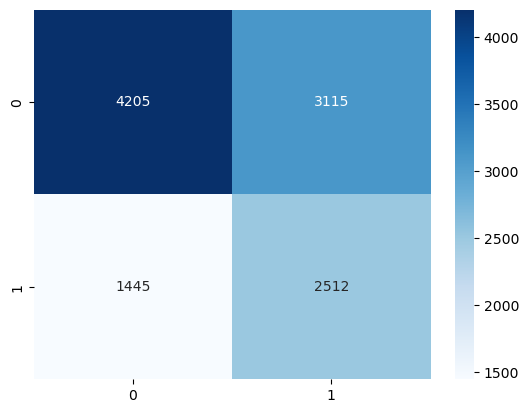

In [42]:
# Print a pretty confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

In [43]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = gbt.feature_importances_
features = X_train_resampled.columns
# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})
# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)
# View dataframe
feature_importance_df

,feature,feature_importance
1,MJEVER,0.664183
2,MJYRTOT,0.158014
7,LSD,0.054187
3,ALCEVER,0.041560
0,CIGEVER,0.031668
8,METHAMEVR,0.021227
4,COCEVER,0.017090
6,HEREVER,0.007982
5,CRKEVER,0.004087


<Axes: xlabel='MJEVER'>

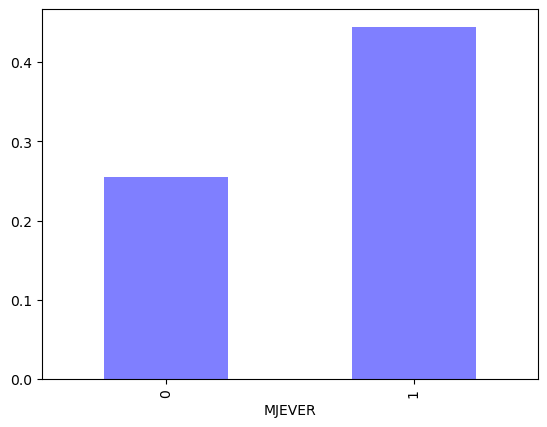

In [52]:
# Group by MJEVER and calculate mean ADDPREV for each group
mjever_addprev = df.groupby('MJEVER')['ADDPREV'].mean()

# Plot the results
mjever_addprev.plot(kind='bar', color='blue', alpha=0.5)

In [53]:
# Perform an analysis of variance (ANOVA) test to determine if there are any significant difference in ADDPREV between MJEVER Groups.

# Import dependencies
import pingouin as pg

# Perform ANOVA test
aov = pg.anova(dv='ADDPREV', between='MJEVER', data=df)

# Print results
print(aov)

   Source  ddof1  ddof2           F  p-unc       np2
0  MJEVER      1  45105  1850.55389    0.0  0.039411


In [ ]:
# q: How do I interpret the results of the t-test?
# a: The p-value is 0.000000000
#    The p-value is less than 0.05, so we reject the null hypothesis.

In [57]:
# Calculate the percent difference between the two groups ADDPREV means
mjever_addprev[1]/mjever_addprev[0]

1.7427166953930355

### There is a significant difference in the mean response to survey question encoded as "ADDPREV": "Have you ever in your life had a period of time lasting several days or longer when most of the day you felt sad, empty or depressed?" between MJEVER groups, with indivudals who have used MJ at least once in their lives (MJEVER == 1) showing a mean ADDPREV score of 174% that of the MJEVER == 0 group. 

In [54]:
# Question: How large are these groups? How many people are in each group?

df.MJEVER.value_counts()

1    22777
0    22330
Name: MJEVER, dtype: int64